In [1]:
#importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset

beer=pd.read_csv('beer_train.csv')
beer.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,10-Aug-76,208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


### Data Preprocessing ###

In [3]:
beer.shape

(37500, 19)

In [4]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

We observe that the user columns have the most null values: (user/ageInSeconds, user/birthdayRaw, user/birthdayUnix, user/gender).<br> 
More than half of the row values for these columns are null. So we are going to neglect these columns for now.

In [5]:
beer_drop_user=beer.copy()

In [6]:
# droppping columns with most null values
beer_drop_user.drop(columns=['user/ageInSeconds','user/birthdayRaw','user/birthdayUnix','user/gender'],inplace=True)
beer_drop_user.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,Brewbro000


In [7]:
#Handling missing values for review/text and user/profileName

beer_drop_user['review/text'].fillna('No Comments', inplace=True)
beer_drop_user['user/profileName'].fillna('Unknown_User', inplace=True)

In [8]:
beer_drop_user.isna().sum()

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
review/timeUnix      0
user/profileName     0
dtype: int64

In [9]:
#Statistical Analysis

beer_drop_user.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09


In [10]:
# Changing the datatype of index,beerId and brewerId to object type
convert_type = {'index': object, 
                'beer/beerId': object,
                'beer/brewerId': object
               } 
  
beer_drop_user = beer_drop_user.astype(convert_type) 

In [11]:
beer_drop_user.describe()

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix
count,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04
mean,7.403725,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09
std,2.318145,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07
min,0.100000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08
25%,5.400000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09
50%,6.900000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09
75%,9.400000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09
max,57.700000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09


In [12]:
#dropping the timeUnix column 
beer_drop_user.drop(columns=['review/timeUnix'], inplace=True)

From the statistical analysis above, we can observe that average value and the median value for most of the columns are somewhat equal except for the column 'beer/ABV'. 

### Data Splitting to perform Prediction Analysis

In [13]:
# Splitting the dataset to train-test
from sklearn.model_selection import train_test_split

train , test = train_test_split(beer_drop_user,test_size=0.2,random_state=0)

train_x = train.drop(columns=['index','review/overall'],axis=1)
train_y = train['review/overall']

test_x = test.drop(columns=['index','review/overall'],axis=1)
test_y = test['review/overall']

train_x.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/text,review/timeStruct,user/profileName
28034,4.0,41683,850,Slow-Vannah Pale Ale,American Pale Ale (APA),4.0,3.5,3.5,3.5,A. Poured a cloudy apricot copper color with a...,"{'min': 31, 'hour': 2, 'mday': 2, 'sec': 30, '...",smibroncos
18012,5.0,5916,1,Gambrinus,Czech Pilsener,3.0,4.0,4.0,3.5,I loved in Czech for 6 months and I would have...,"{'min': 39, 'hour': 18, 'mday': 13, 'sec': 52,...",CampusCrew
764,7.5,64848,24447,Li'l Napoleon,American IPA,4.0,4.0,4.0,4.0,Pours a clear copper color with a thick white ...,"{'min': 48, 'hour': 2, 'mday': 15, 'sec': 55, ...",JayS2629
13449,5.0,25382,394,Oktober Fest,MÃ¤rzen / Oktoberfest,3.0,3.0,3.0,3.5,appearance: pours a clear yellowish-orange wit...,"{'min': 48, 'hour': 23, 'mday': 2, 'sec': 50, ...",weller1js
33529,6.6,16074,1199,Founders Red's Rye PA,Rye Beer,4.0,4.0,3.5,4.0,"Nicely carbonated, poured a deep amber/dark ho...","{'min': 25, 'hour': 21, 'mday': 29, 'sec': 49,...",twoheadedboy


#### Correlation Matrix to select important features for prediction

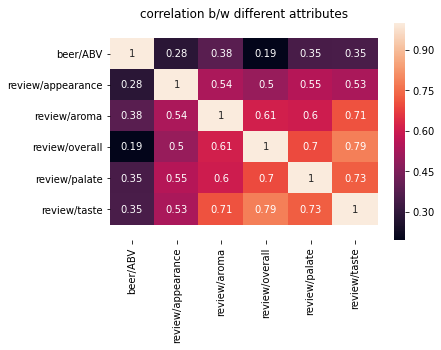

In [14]:
import seaborn as sns

ax=sns.heatmap(train.corr(),annot=True)
plt.title("correlation b/w different attributes")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

The target variable 'review/overall' seem to be correlated with other review columns.

### MODEL 1: Linear Regression

In [15]:
#MODEL 1: Linear Regression

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
z=train[['review/appearance','review/aroma','review/palate','review/taste']]
lm.fit(z,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
test_pred=lm.predict(test[['review/appearance','review/aroma','review/palate','review/taste']])

In [17]:
print("the intercept: ",lm.intercept_)
print("the coefficient: ",lm.coef_)

the intercept:  0.3925361372133307
the coefficient:  [0.0550938  0.05788939 0.24787268 0.53599207]


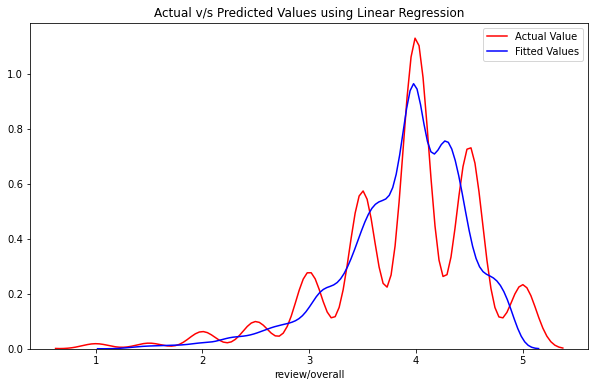

In [56]:
plt.figure(figsize=(10,6))
ax=sns.distplot(test_y,hist=False,color='r',label='Actual Value')
sns.distplot(test_pred,hist=False,color='b',label='Fitted Values')
plt.title("Actual v/s Predicted Values using Linear Regression")
plt.show()

#### Validation Metrics 1: RMSE

In [19]:
#Metric 1: Root Mean Squared Error
from sklearn.metrics import mean_squared_error

print("RMSE\n")
print(np.sqrt(mean_squared_error(test_y,test_pred)))

RMSE

0.41710301333812455


#### Validation Metrics 2: Cross Validation Score

In [20]:
#Metric 2

from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=lm,X=z,y=train_y,cv=10)
print(accuracy.mean())

0.6527219013694869


### MODEL 2: Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=20,min_samples_leaf=100)
tree.fit(z,train_y)
tree_pred=tree.predict(test[['review/appearance','review/aroma','review/palate','review/taste']])

In [22]:
tree_accuracy=cross_val_score(estimator=tree,X=z,y=train_y,cv=10)
print(tree_accuracy.mean())

0.6595959356236876


In [23]:
print("RMSE\n")
print(np.sqrt(mean_squared_error(test_y,tree_pred)))

RMSE

0.4130620467905455


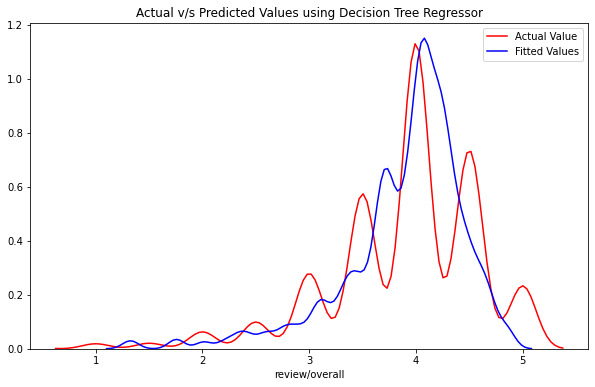

In [59]:
plt.figure(figsize=(10,6))
ax=sns.distplot(test_y,hist=False,color='r',label='Actual Value')
sns.distplot(tree_pred,hist=False,color='b',label='Fitted Values')
plt.title("Actual v/s Predicted Values using Decision Tree Regressor")
plt.show()

### MODEL 3: Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(z,train_y)
rf_pred=rf.predict(test[['review/appearance','review/aroma','review/palate','review/taste']])
rf_accuracy=cross_val_score(estimator=rf,X=z,y=train_y,cv=10)
print(rf_accuracy.mean())

0.6584043753745153


In [32]:
print("RMSE\n")
print(np.sqrt(mean_squared_error(test_y,rf_pred)))

RMSE

0.41438082714262453


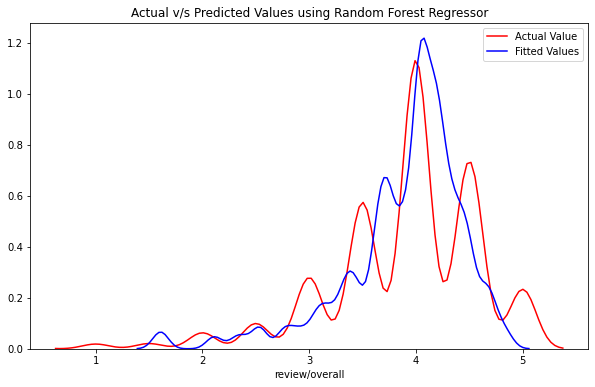

In [60]:
plt.figure(figsize=(10,6))
ax=sns.distplot(test_y,hist=False,color='r',label='Actual Value')
sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values')
plt.title("Actual v/s Predicted Values using Random Forest Regressor")
plt.show()

In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### MODEL 4: XGBoost Regressor

In [27]:
from xgboost import XGBRegressor

xg=XGBRegressor(n_estimators=1000,learning_rate=0.05)
xg.fit(z,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1000, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [28]:
xg_pred=xg.predict(test[['review/appearance','review/aroma','review/palate','review/taste']])

#xg_accuracy=cross_val_score(estimator=xg,X=z,y=train_y,cv=10)

xg_accuracy=round(xg.score(z,train_y))
print(xg_accuracy)

1


In [29]:
print("RMSE\n")
print(np.sqrt(mean_squared_error(test_y,xg_pred)))

RMSE

0.4201591297277739


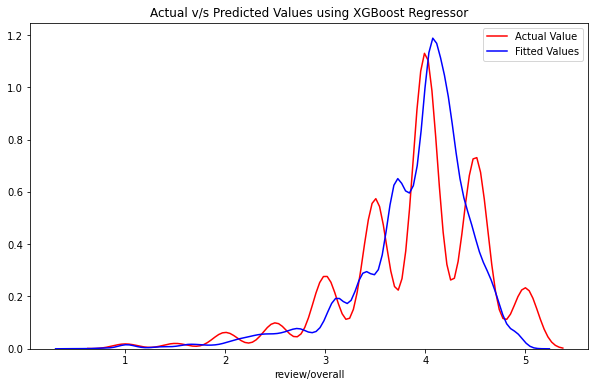

In [61]:
plt.figure(figsize=(10,6))
ax=sns.distplot(test_y,hist=False,color='r',label='Actual Value')
sns.distplot(xg_pred,hist=False,color='b',label='Fitted Values')
plt.title("Actual v/s Predicted Values using XGBoost Regressor")
plt.show()

In [40]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


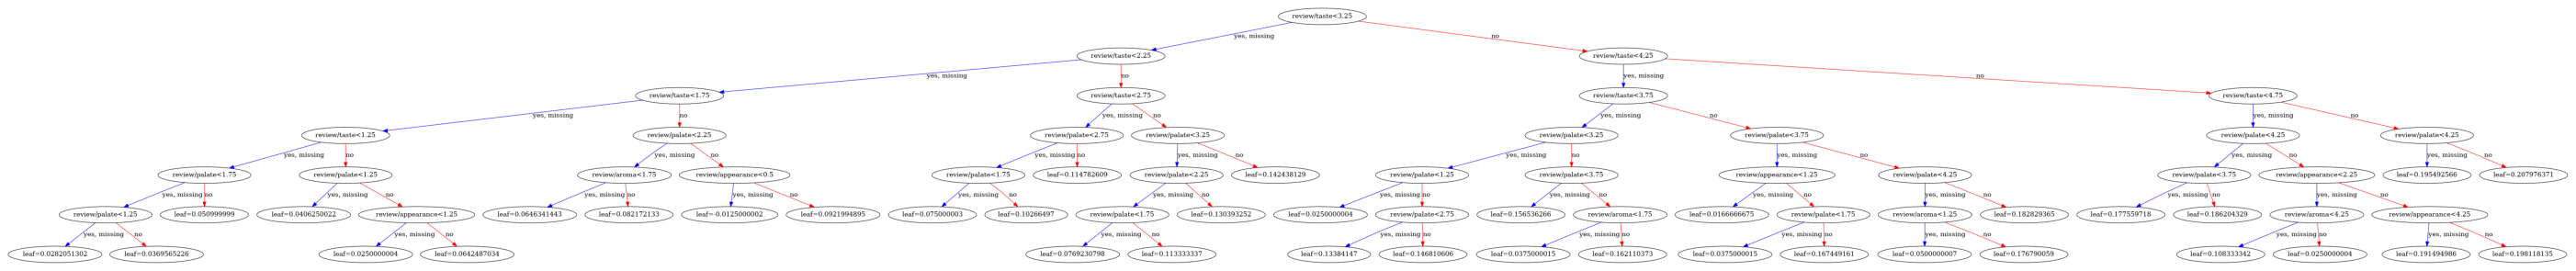

In [45]:
# XGBoost Tree
import xgboost as xgb

xgb.plot_tree(xg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 1000]
plt.show()

## Conclusion: </br>
**RMSE Scores** </br>
Linear Regression: 0.417 </br>
Decision Tree Regression: 0.413</br>
Random Forest Regressor: 0.414</br>
XGBoost Regressor: 0.420</br></br>
For the proposed dataset **Decision Tree Regressor** yields the least RMSE value indicating a more accurate model.

In [72]:
#Comparing the Actual and Predicted Values through Decision Tree
comp_pred=pd.DataFrame(test_y)
comp_pred['Predicted Review']=tree_pred

In [73]:
comp_pred.head(10)

,review/overall,Predicted Review
415,4.0,3.933775
24375,4.0,3.668998
21599,3.5,3.922414
937,4.5,4.702020
26595,4.0,3.998547
13546,4.5,4.570513
18702,4.0,3.983840
9336,4.0,3.986239
13954,4.0,4.009554
14822,4.0,3.890052
